In [ ]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
!pip install kagglehub
!pip install --upgrade tensorflow keras
!pip install opencv-python
!pip install matplotlib scikit-learn

In [ ]:
import kagglehub

# Download the latest version of the dataset
path = kagglehub.dataset_download("mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out")
print("Path to dataset files:", path)
# One way of downloading, I didn't end up using it

Path to dataset files: /root/.cache/kagglehub/datasets/mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out/versions/2


In [ ]:
import os
from google.colab import files

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out
!unzip asl-rgb-depth-fingerspelling-spelling-it-out.zip -d /content/asl_dataset

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mrgeislinger/asl-rgb-depth-fingerspelling-spelling-it-out
License(s): unknown
asl-rgb-depth-fingerspelling-spelling-it-out.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  asl-rgb-depth-fingerspelling-spelling-it-out.zip
replace /content/asl_dataset/dataset5/A/a/color_0_0002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import glob

def get_labels_images(filepath):
    data_dict = {}
    for directory in glob.glob(filepath):
        images = []
        for file in glob.glob(os.path.join(directory, 'color_*.png')):
            images.append(file)
        label = os.path.basename(os.path.normpath(directory))[-1]
        data_dict.setdefault(label, images)
    return data_dict

dataset_dir = "/content/asl_dataset/dataset5/*/*"
data_dict = get_labels_images(dataset_dir)
data_dict

{'p': ['/content/asl_dataset/dataset5/C/p/color_15_0446.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0269.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0292.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0498.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0427.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0273.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0370.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0403.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0511.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0277.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0050.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0304.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0499.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0309.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0077.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0380.png',
  '/content/asl_dataset/dataset5/C/p/color_15_0420.png',
  '/content/asl_dataset/da

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.applications.vgg19 import VGG19

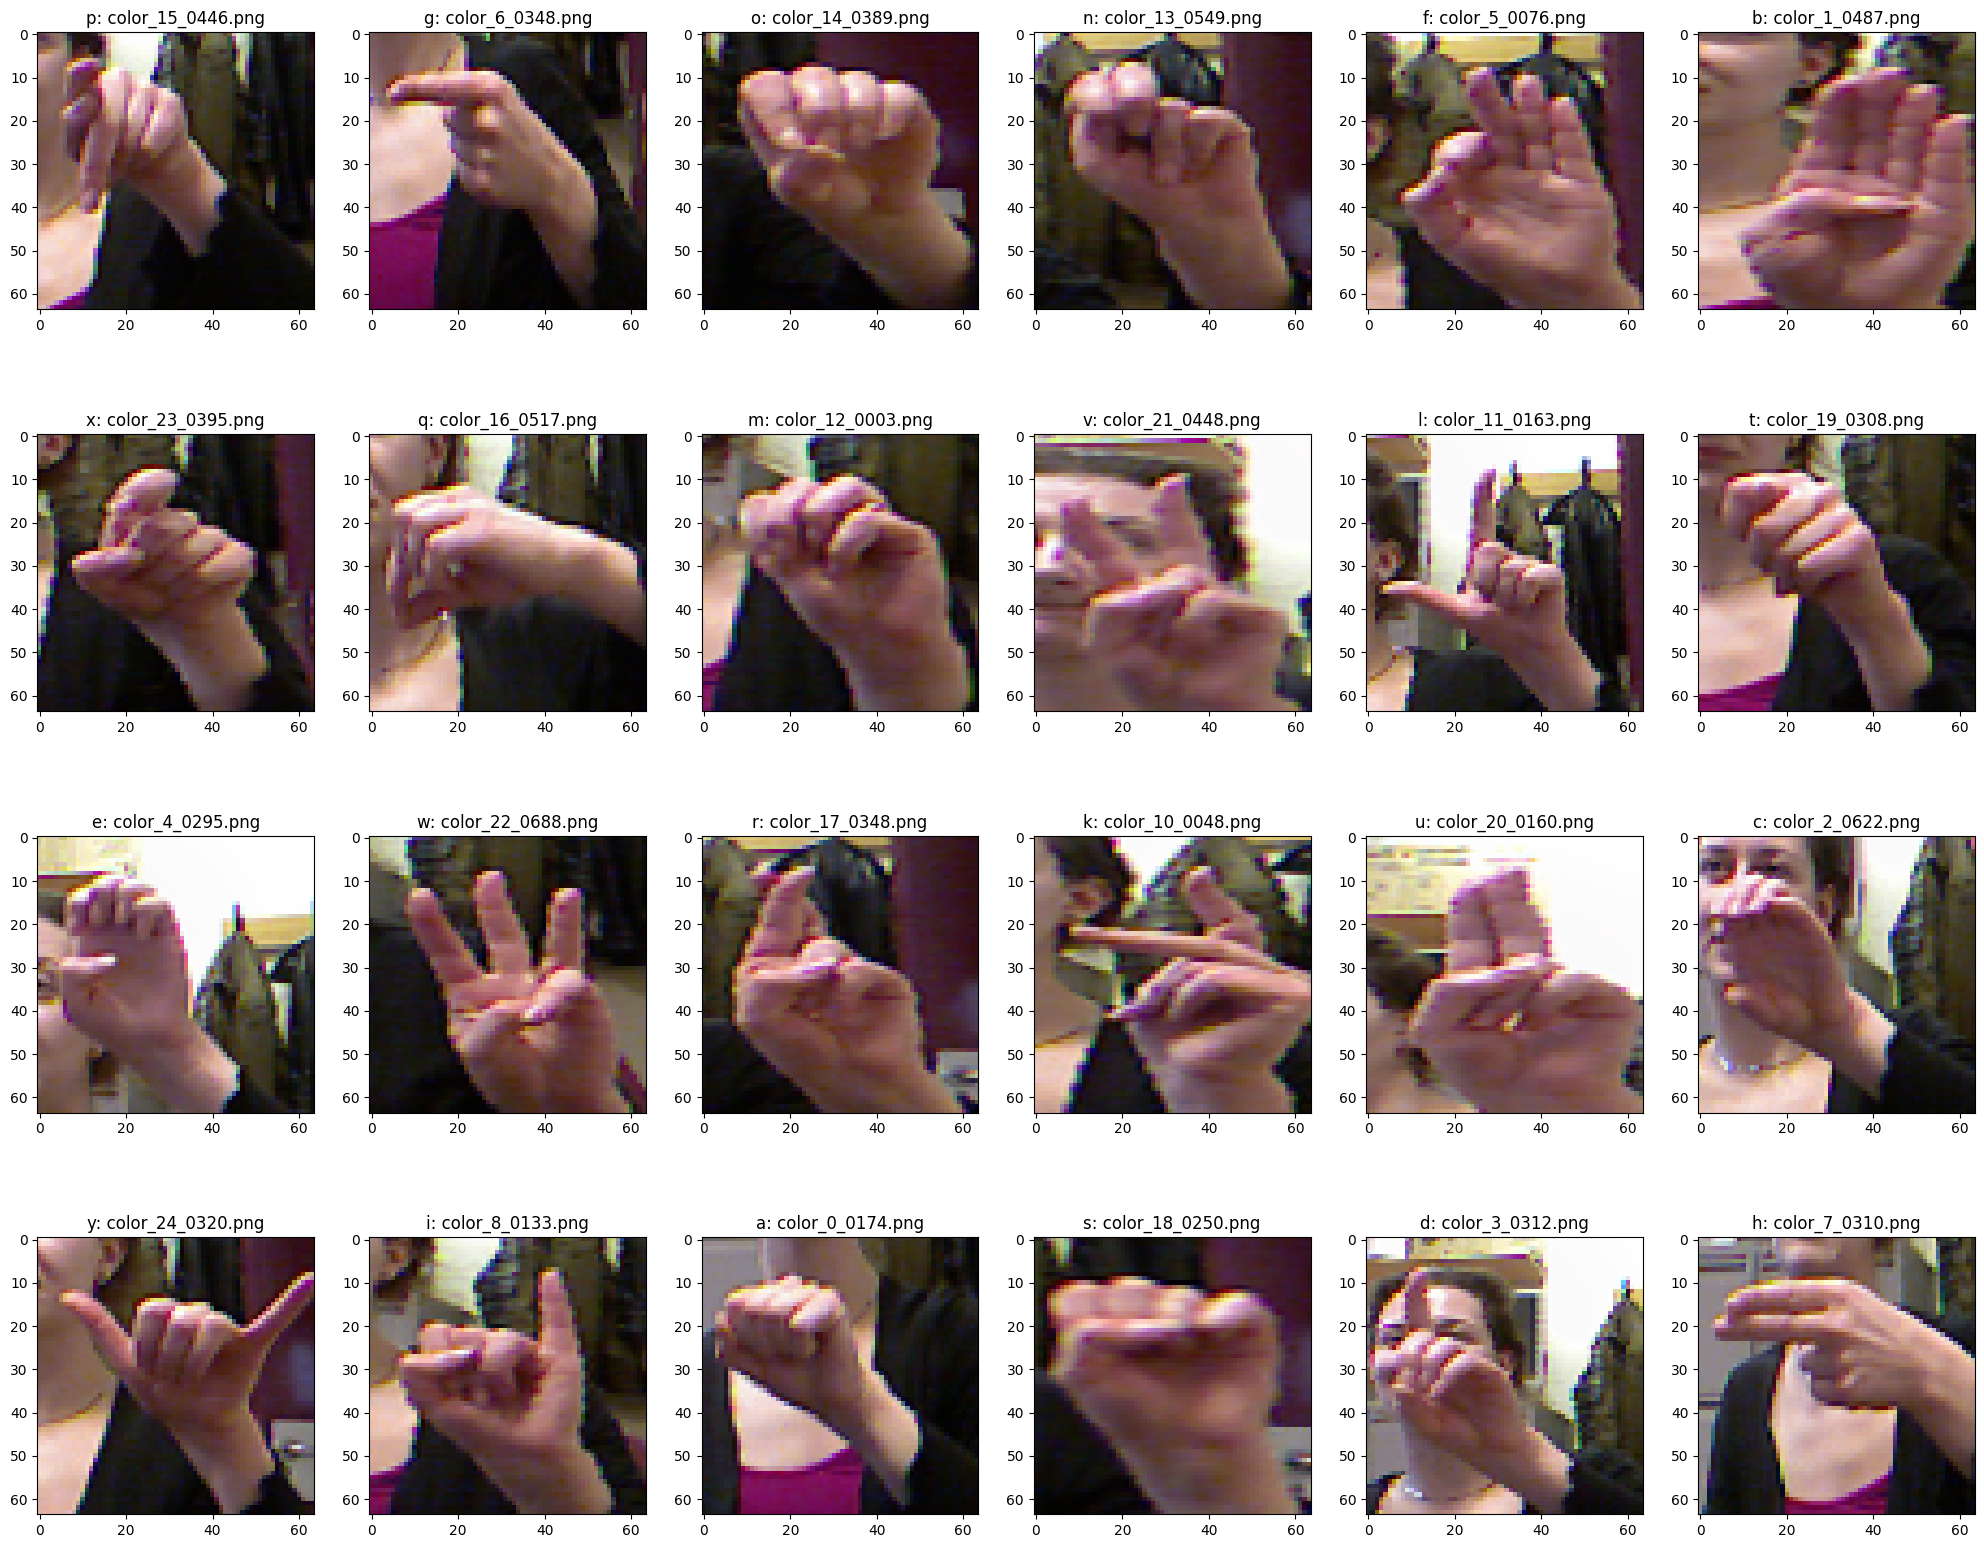

In [ ]:
plt.figure(figsize=(25, 20))

for i, (k, v) in enumerate(data_dict.items()):
    img = cv2.imread(v[0])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (64, 64))
    plt.subplot(4, 6, i + 1)
    plt.imshow(img)
    plt.title(f"{k}: {os.path.basename(v[0])}")

plt.show()

In [ ]:
def preprocess_images(dictionary, height = 64, width = 64):
    images = []
    labels = []
    for k,v in dictionary.items():
        for file in v:
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (height, width))
            img = img / 255.
            images.append(img)
            labels.append(k)

    return (np.array(images), np.array(labels).reshape(-1,1))

images, labels = preprocess_images(data_dict)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lbl_binarizer = LabelBinarizer()
labels = lbl_binarizer.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1)

print('Number of training samples:{}, Shape: {}'.format(len(X_train), X_train.shape))
print('Number of dev samples:{}, Shape: {}'.format(len(X_dev), X_dev.shape))
print('Number of test samples:{}, Shape: {}'.format(len(X_test), X_test.shape))

Number of training samples:8035, Shape: (8035, 64, 64, 3)
Number of dev samples:2679, Shape: (2679, 64, 64, 3)
Number of test samples:2679, Shape: (2679, 64, 64, 3)


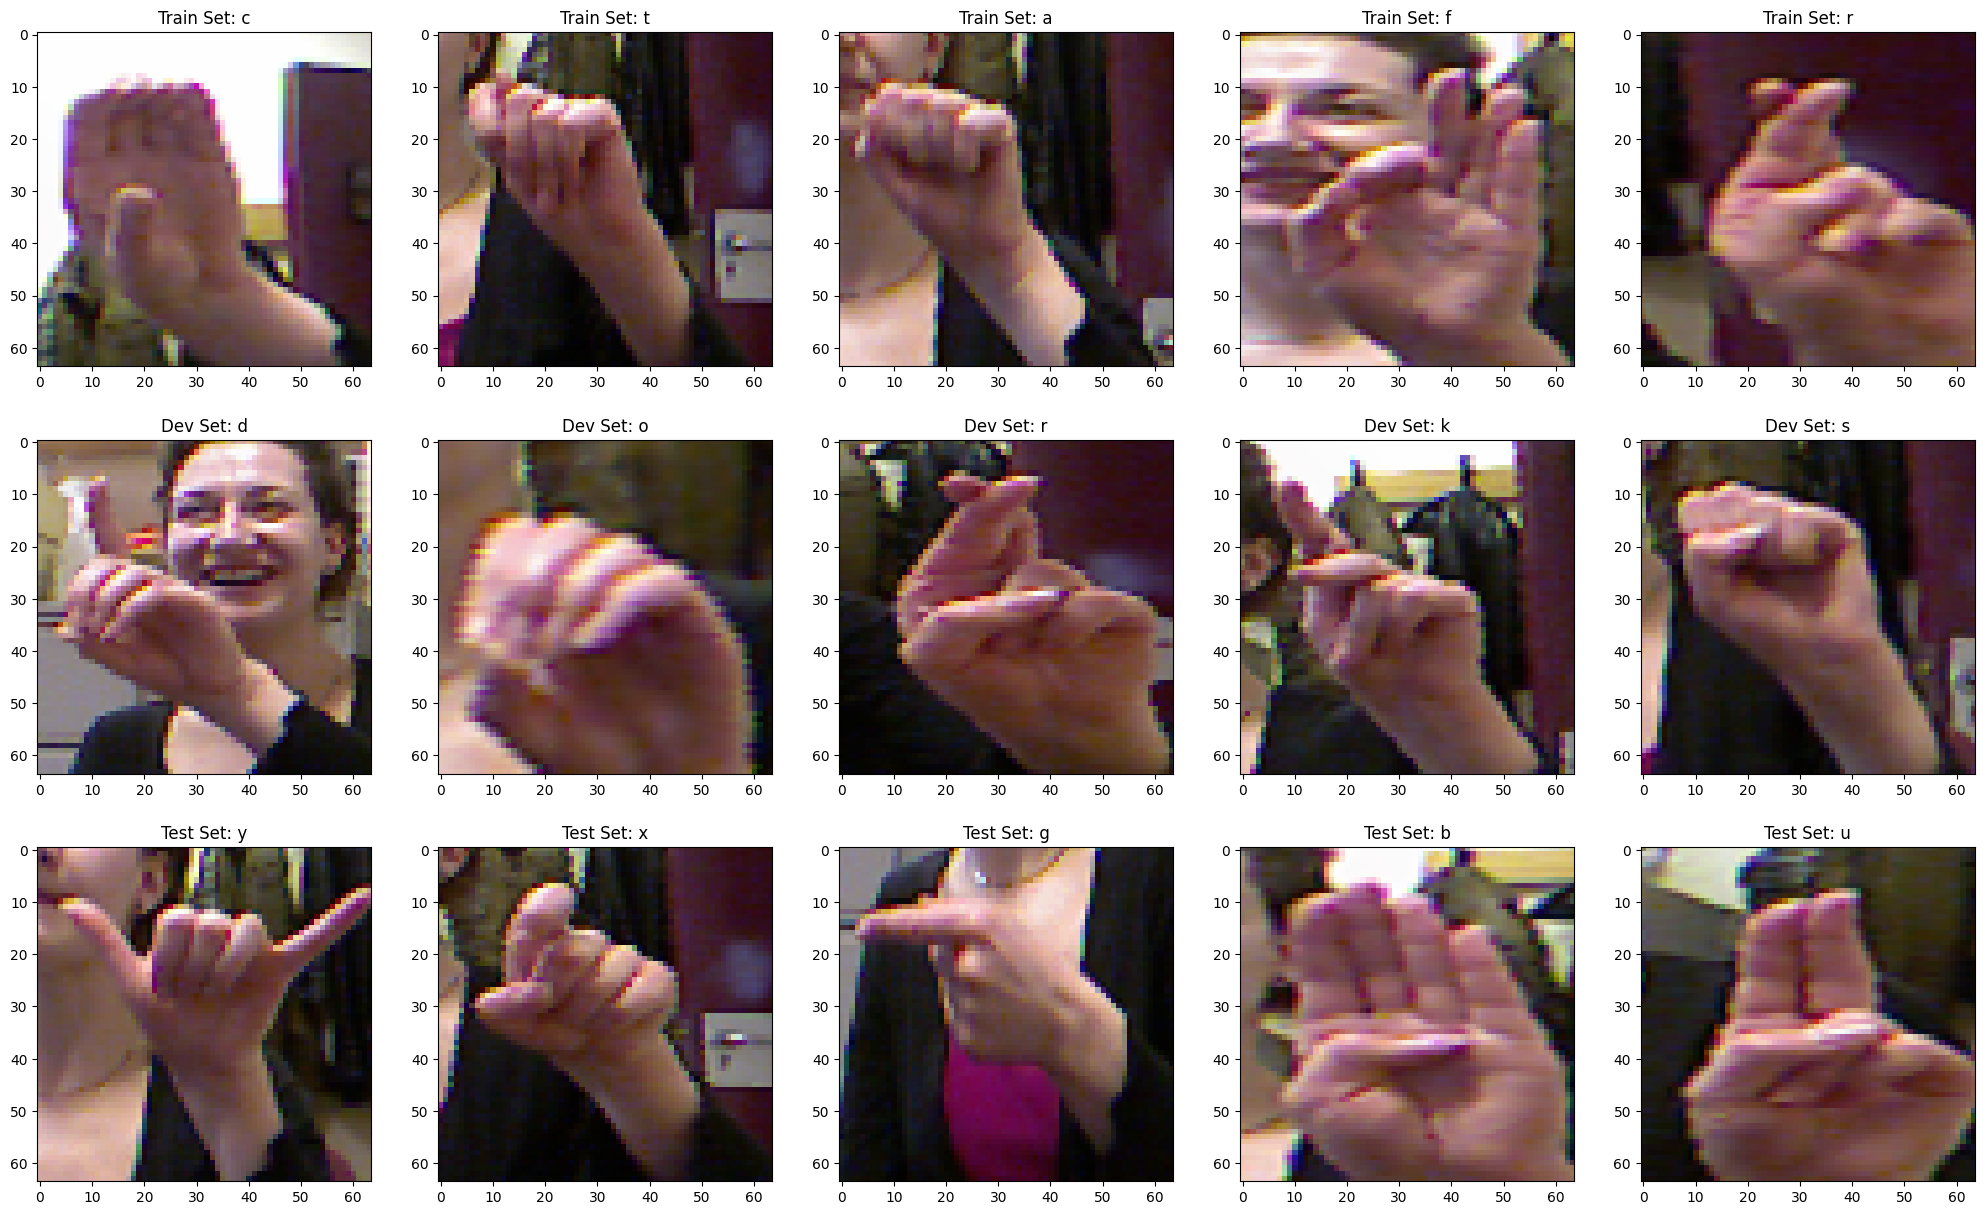

In [ ]:
plt.figure(figsize = (25,15))

for i in range(5):
    plt.subplot(3,5,i+1)
    plt.imshow(X_train[i])
    plt.title('Train Set: {}'.format(lbl_binarizer.classes_[np.argmax(Y_train[i], axis = -1)]))

for i in range(5,10):
    plt.subplot(3,5,i+1)
    plt.imshow(X_dev[i])
    plt.title('Dev Set: {}'.format(lbl_binarizer.classes_[np.argmax(Y_dev[i], axis = -1)]))

for i in range(10,15):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i])
    plt.title('Test Set: {}'.format(lbl_binarizer.classes_[np.argmax(Y_test[i], axis = -1)]))

plt.show()

In [ ]:
import keras
from keras.applications.vgg19 import VGG19

img_height = 64
img_width = 64
img_channels = 3
num_classes = labels.shape[1]
learning_rate = 1e-5
weights = '/content/drive/My Drive/APDS_2024/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

def build_model():
    base = VGG19(include_top=False, weights=weights, input_shape=(img_height, img_width, img_channels))
    base.trainable = False

    X = keras.layers.Flatten()(base.output)
    X = keras.layers.Dense(512, activation='relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation='relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(num_classes, activation='softmax')(X)

    model = keras.models.Model(inputs=base.input, outputs=preds)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,352,536 (81.45 MB)

 Trainable params: 1,326,104 (5.06 MB)

 Non-trainable params: 20,026,432 (76.39 MB)

In [ ]:
!pip install --upgrade tensorflow keras

In [ ]:
# No need to run this, this was for debug
import os
weights_path = '/content/drive/My Drive/APDS_2024/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'
if os.path.exists(weights_path):
    print("Weights file found.")
else:
    print("Weights file not found.")

Weights file found.


In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0, restore_best_weights = True)]

history = model.fit(X_train, Y_train,
                    epochs = 30, # I don't have GPU so can't run further, but we observe it's above to converge, please try epoch 50 or more
                    batch_size = 128,
                    validation_data = (X_dev, Y_dev),
                    callbacks = callbacks)

Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 141ms/step - accuracy: 0.3935 - loss: 2.0821 - val_accuracy: 0.6226 - val_loss: 1.5276
Epoch 2/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.4174 - loss: 1.9740 - val_accuracy: 0.6366 - val_loss: 1.4461
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - accuracy: 0.4472 - loss: 1.8870 - val_accuracy: 0.6511 - val_loss: 1.3726
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 117ms/step - accuracy: 0.4702 - loss: 1.8077 - val_accuracy: 0.6621 - val_loss: 1.3078
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - accuracy: 0.4715 - loss: 1.7444 - val_accuracy: 0.6777 - val_loss: 1.2451
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.5102 - loss: 1.6613 - val_accuracy: 0.6948 - val_loss: 1.1910
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.5171 - loss: 1.6263 - val_accuracy: 0.7047 - val_loss: 1.1343
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 130ms/step - accuracy: 0.5483 - loss: 1.5240 - val_accuracy

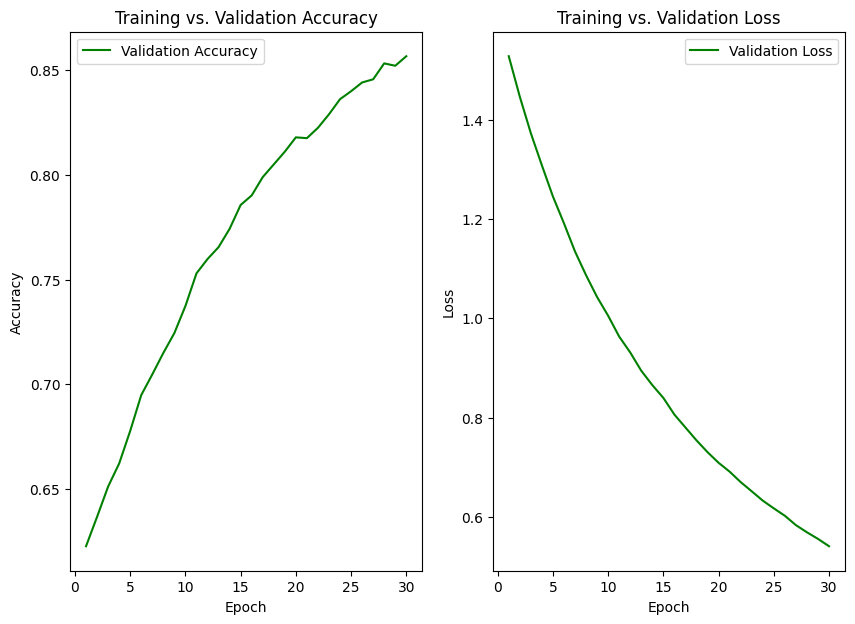

In [ ]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 7))

plt.subplot(1,2,1)
plt.plot(epochs, val_acc, c = 'g', label = 'Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, val_loss, c = 'g', label = 'Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
eval_loss, eval_acc = model.evaluate(X_test, Y_test)
print(f'Evaluation Loss: {eval_loss:.4f}, Evaluation Accuracy: {eval_acc * 100:.2f}%')

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8483 - loss: 0.5588
Evaluation Loss: 0.5486, Evaluation Accuracy: 85.86%


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


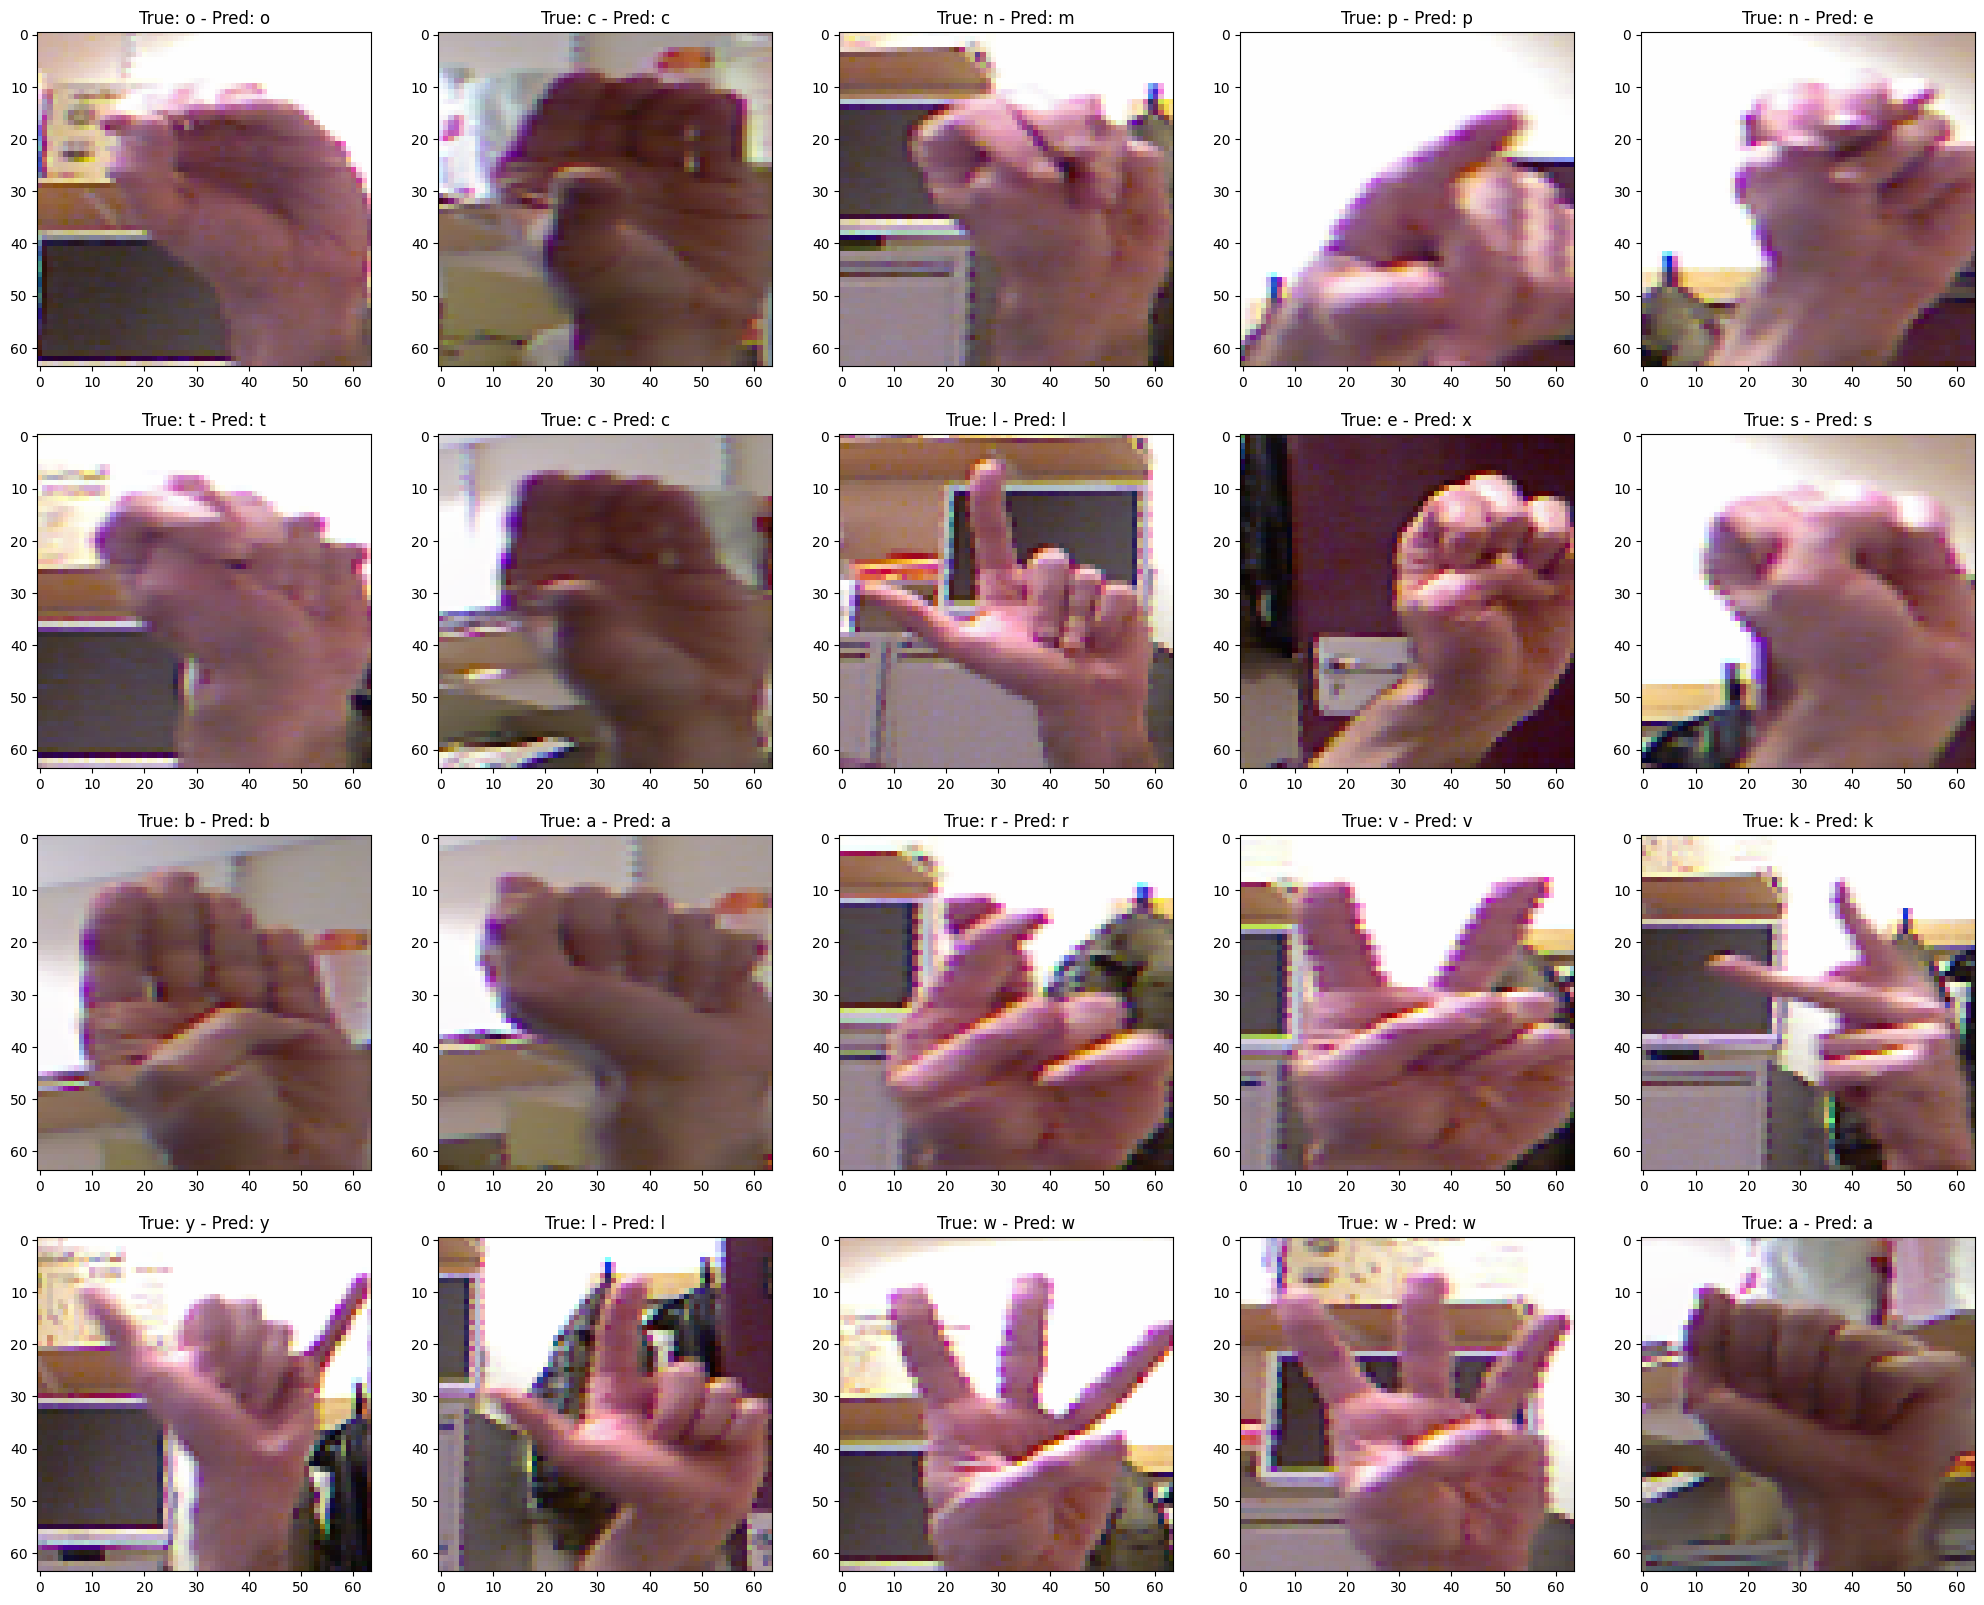

In [ ]:
preds = model.predict(X_test)

plt.figure(figsize=(25, 20))
num_images = 20
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = lbl_binarizer.classes_[np.argmax(Y_test[i], axis=-1)]
    pred_label = lbl_binarizer.classes_[np.argmax(preds[i], axis=-1)]
    plt.title(f'True: {true_label} - Pred: {pred_label}')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


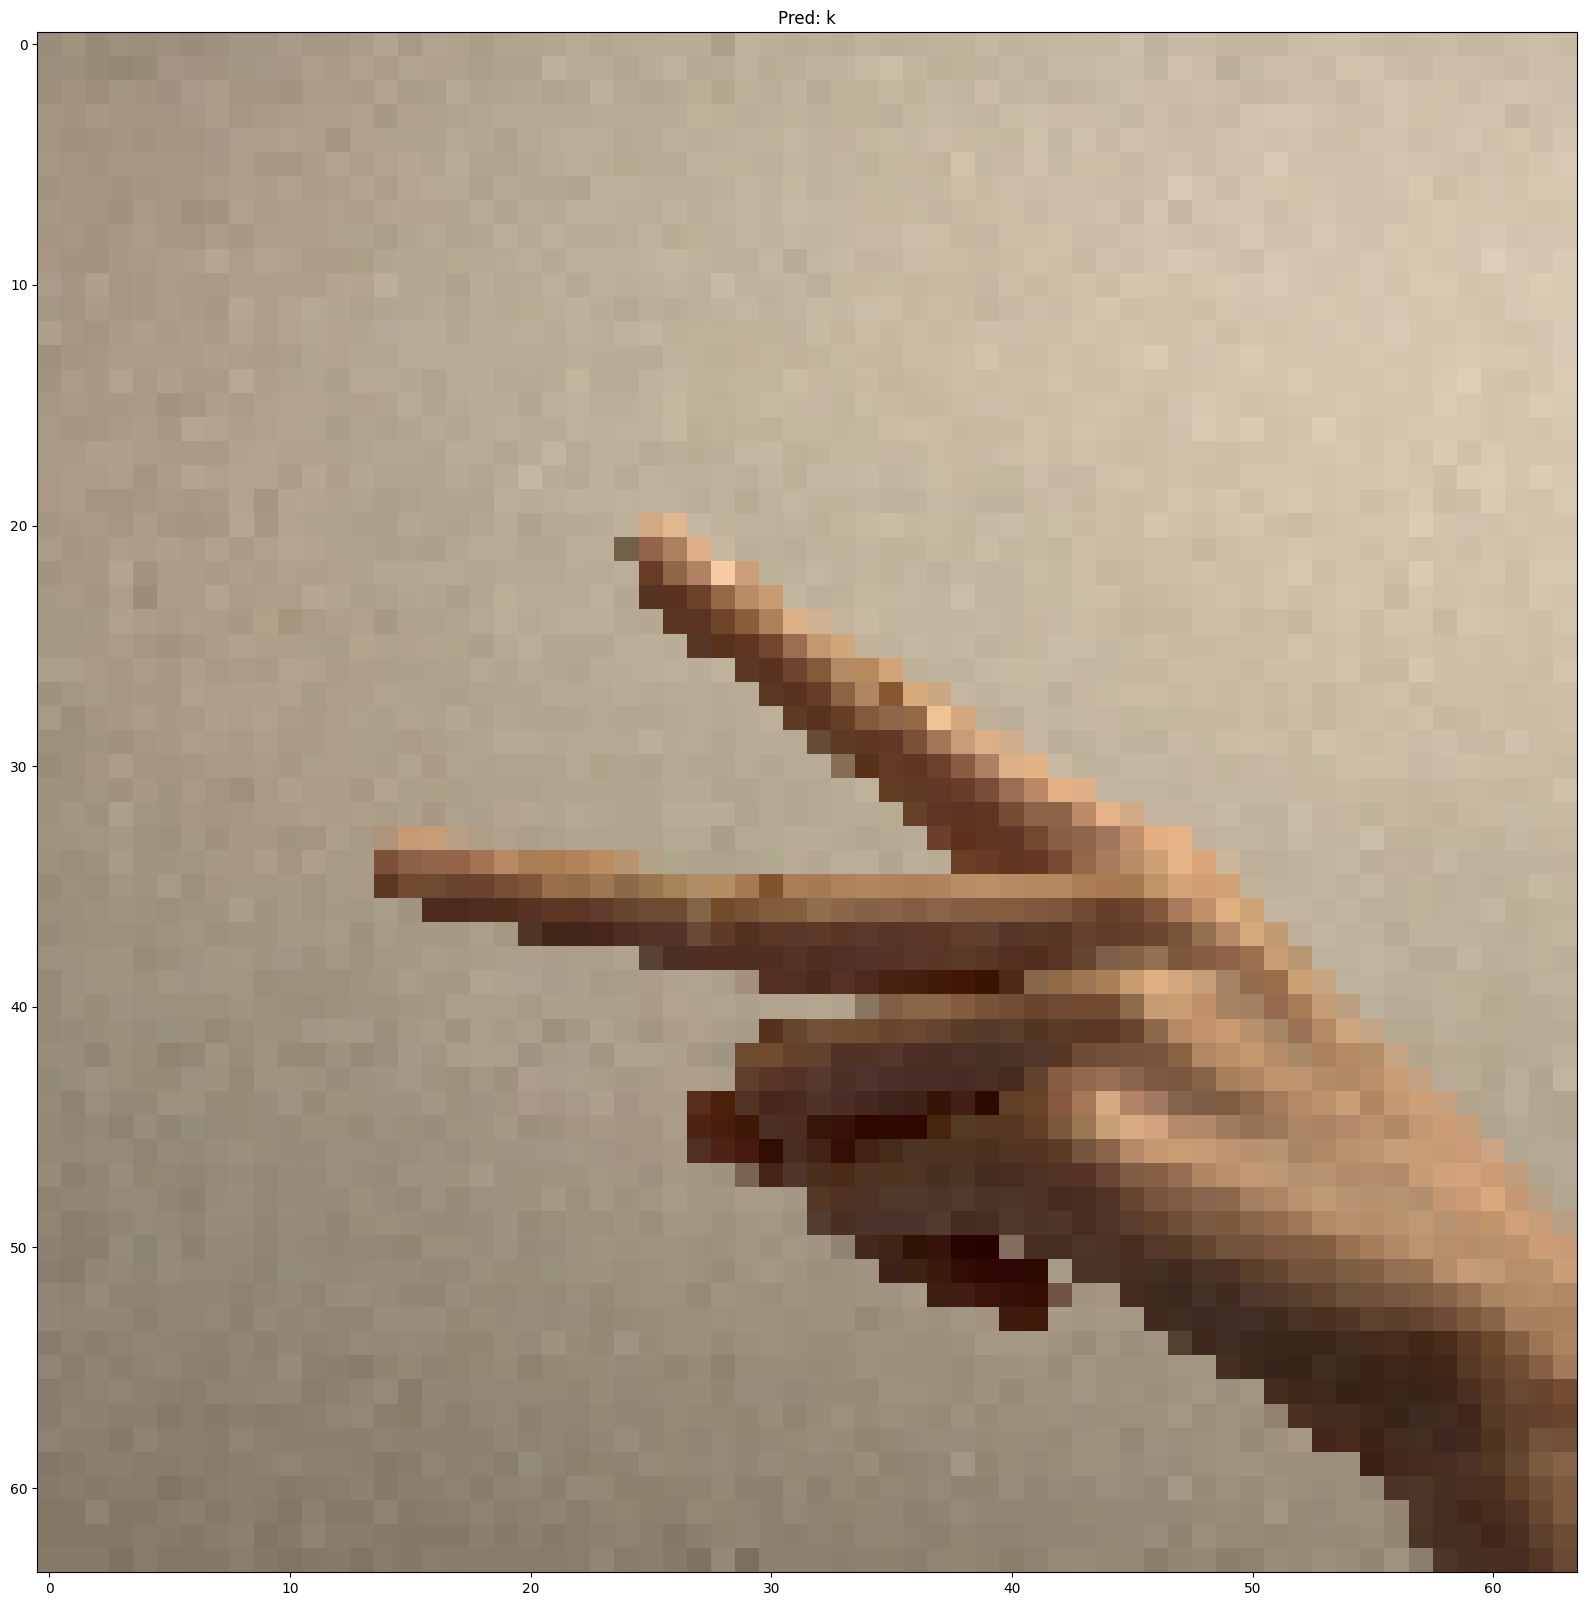

In [ ]:
custom_images_path = "/content/drive/My Drive/APDS_2024/my_hand_ASL"  # ASL with my hand (so probably not that accurate)

def prepare_custom_images(filepath, height=64, width=64):
    images = []
    for file in os.listdir(filepath):
        img_path = os.path.join(filepath, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (height, width))
        img = img / 255.0
        images.append(img)
    return np.array(images)

custom_images = prepare_custom_images(custom_images_path)

custom_preds = model.predict(custom_images)

plt.figure(figsize=(25, 20))
for i in range(len(custom_preds)):
    plt.subplot(1, len(custom_preds), i + 1)
    plt.imshow(custom_images[i])
    pred_label = lbl_binarizer.classes_[np.argmax(custom_preds[i], axis=-1)]
    plt.title(f'Pred: {pred_label}')

plt.show()

In [ ]:
model.save('/content/drive/My Drive/APDS_2024/my_model.h5')

## Above is the version with RGB. Starting from there, we'd like to proceed for ASL translation. This time we're using depth images.

In [ ]:
import os
import glob

def get_labels_images(filepath):
    data_dict = {}
    for directory in glob.glob(filepath):
        images = []
        for file in glob.glob(os.path.join(directory, 'depth_*.png')):
            images.append(file)
        label = os.path.basename(os.path.normpath(directory))[-1]
        data_dict.setdefault(label, images)
    return data_dict

dataset_dir = "/content/asl_dataset/dataset5/*/*"
data_dict = get_labels_images(dataset_dir)
data_dict

{'p': ['/content/asl_dataset/dataset5/C/p/depth_15_0358.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0179.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0005.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0442.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0346.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0256.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0009.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0015.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0024.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0302.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0414.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0477.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0437.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0458.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0262.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0194.png',
  '/content/asl_dataset/dataset5/C/p/depth_15_0436.png',
  '/content/asl_dataset/da

In [ ]:
def preprocess_images(dictionary, height = 64, width = 64):
    images = []
    labels = []
    for k,v in dictionary.items():
        for file in v:
            img = cv2.imread(file)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (height, width))
            img = img / 255.
            images.append(img)
            labels.append(k)

    return (np.array(images), np.array(labels).reshape(-1,1))

images, labels = preprocess_images(data_dict)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lbl_binarizer = LabelBinarizer()
labels = lbl_binarizer.fit_transform(labels)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.2, random_state = 1)
X_train, X_dev, Y_train, Y_dev = train_test_split(X_train, Y_train, test_size = 0.25, random_state = 1)

print('Number of training samples:{}, Shape: {}'.format(len(X_train), X_train.shape))
print('Number of dev samples:{}, Shape: {}'.format(len(X_dev), X_dev.shape))
print('Number of test samples:{}, Shape: {}'.format(len(X_test), X_test.shape))

Number of training samples:8049, Shape: (8049, 64, 64, 3)
Number of dev samples:2684, Shape: (2684, 64, 64, 3)
Number of test samples:2684, Shape: (2684, 64, 64, 3)


In [ ]:
import keras
from keras.applications.vgg19 import VGG19

img_height = 64
img_width = 64
img_channels = 3
num_classes = labels.shape[1]
learning_rate = 1e-5
weights = '/content/drive/My Drive/APDS_2024/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

def build_model():
    base = VGG19(include_top=False, weights=weights, input_shape=(img_height, img_width, img_channels))
    base.trainable = False

    X = keras.layers.Flatten()(base.output)
    X = keras.layers.Dense(512, activation='relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation='relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(num_classes, activation='softmax')(X)

    model = keras.models.Model(inputs=base.input, outputs=preds)
    model.compile(
        optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

model = build_model()
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,352,536 (81.45 MB)

 Trainable params: 1,326,104 (5.06 MB)

 Non-trainable params: 20,026,432 (76.39 MB)

In [ ]:
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5, verbose = 0, restore_best_weights = True)]

history = model.fit(X_train, Y_train,
                    epochs = 2, # I don't have GPU and it takes around 30 min for 1 epoch. Please run with 30 epochs for its real behavior.
                    batch_size = 128,
                    validation_data = (X_dev, Y_dev),
                    callbacks = callbacks)

Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 682s 11s/step - accuracy: 0.0515 - loss: 3.8603 - val_accuracy: 0.0369 - val_loss: 3.2937
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 683s 11s/step - accuracy: 0.0633 - loss: 3.7925 - val_accuracy: 0.0369 - val_loss: 3.3101


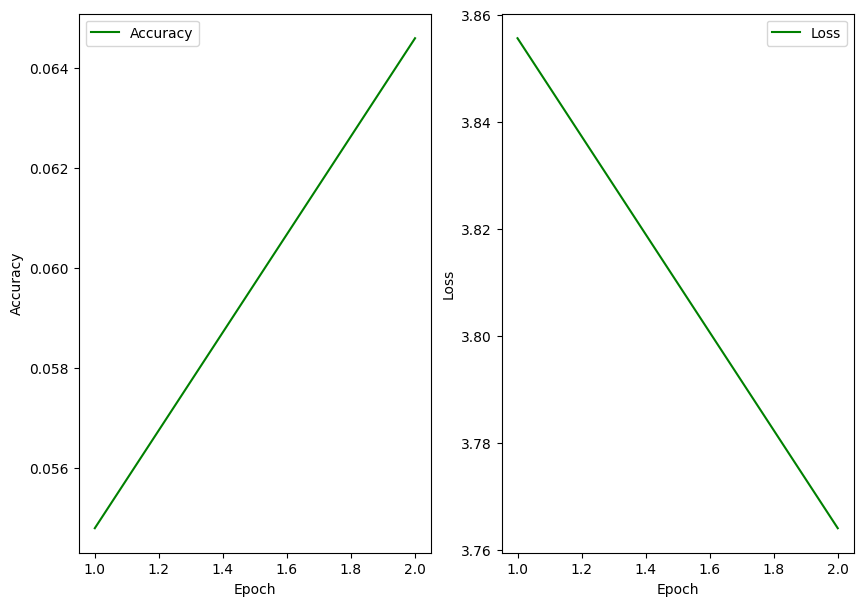

In [ ]:
acc = history.history['accuracy']
los = history.history['loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10, 7))

plt.subplot(1,2,1)
plt.plot(epochs, acc, c = 'g', label = 'Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, los, c = 'g', label = 'Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

##### While showing reasonable learning behavior, more epochs with GPU would significantly incerase its behavior.

In [ ]:
eval_loss, eval_acc = model.evaluate(X_test, Y_test)
print(f'Evaluation Loss: {eval_loss:.4f}, Evaluation Accuracy: {eval_acc * 100:.2f}%')

83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8483 - loss: 0.5588
Evaluation Loss: 0.5486, Evaluation Accuracy: 85.86%


In [ ]:
eval_loss, eval_acc = model.evaluate(X_test, Y_test)
print(f'Evaluation Loss: {eval_loss:.4f}, Evaluation Accuracy: {eval_acc * 100:.2f}%')

84/84 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.0411 - loss: 3.2887
Evaluation Loss: 3.2949, Evaluation Accuracy: 3.76%


83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step


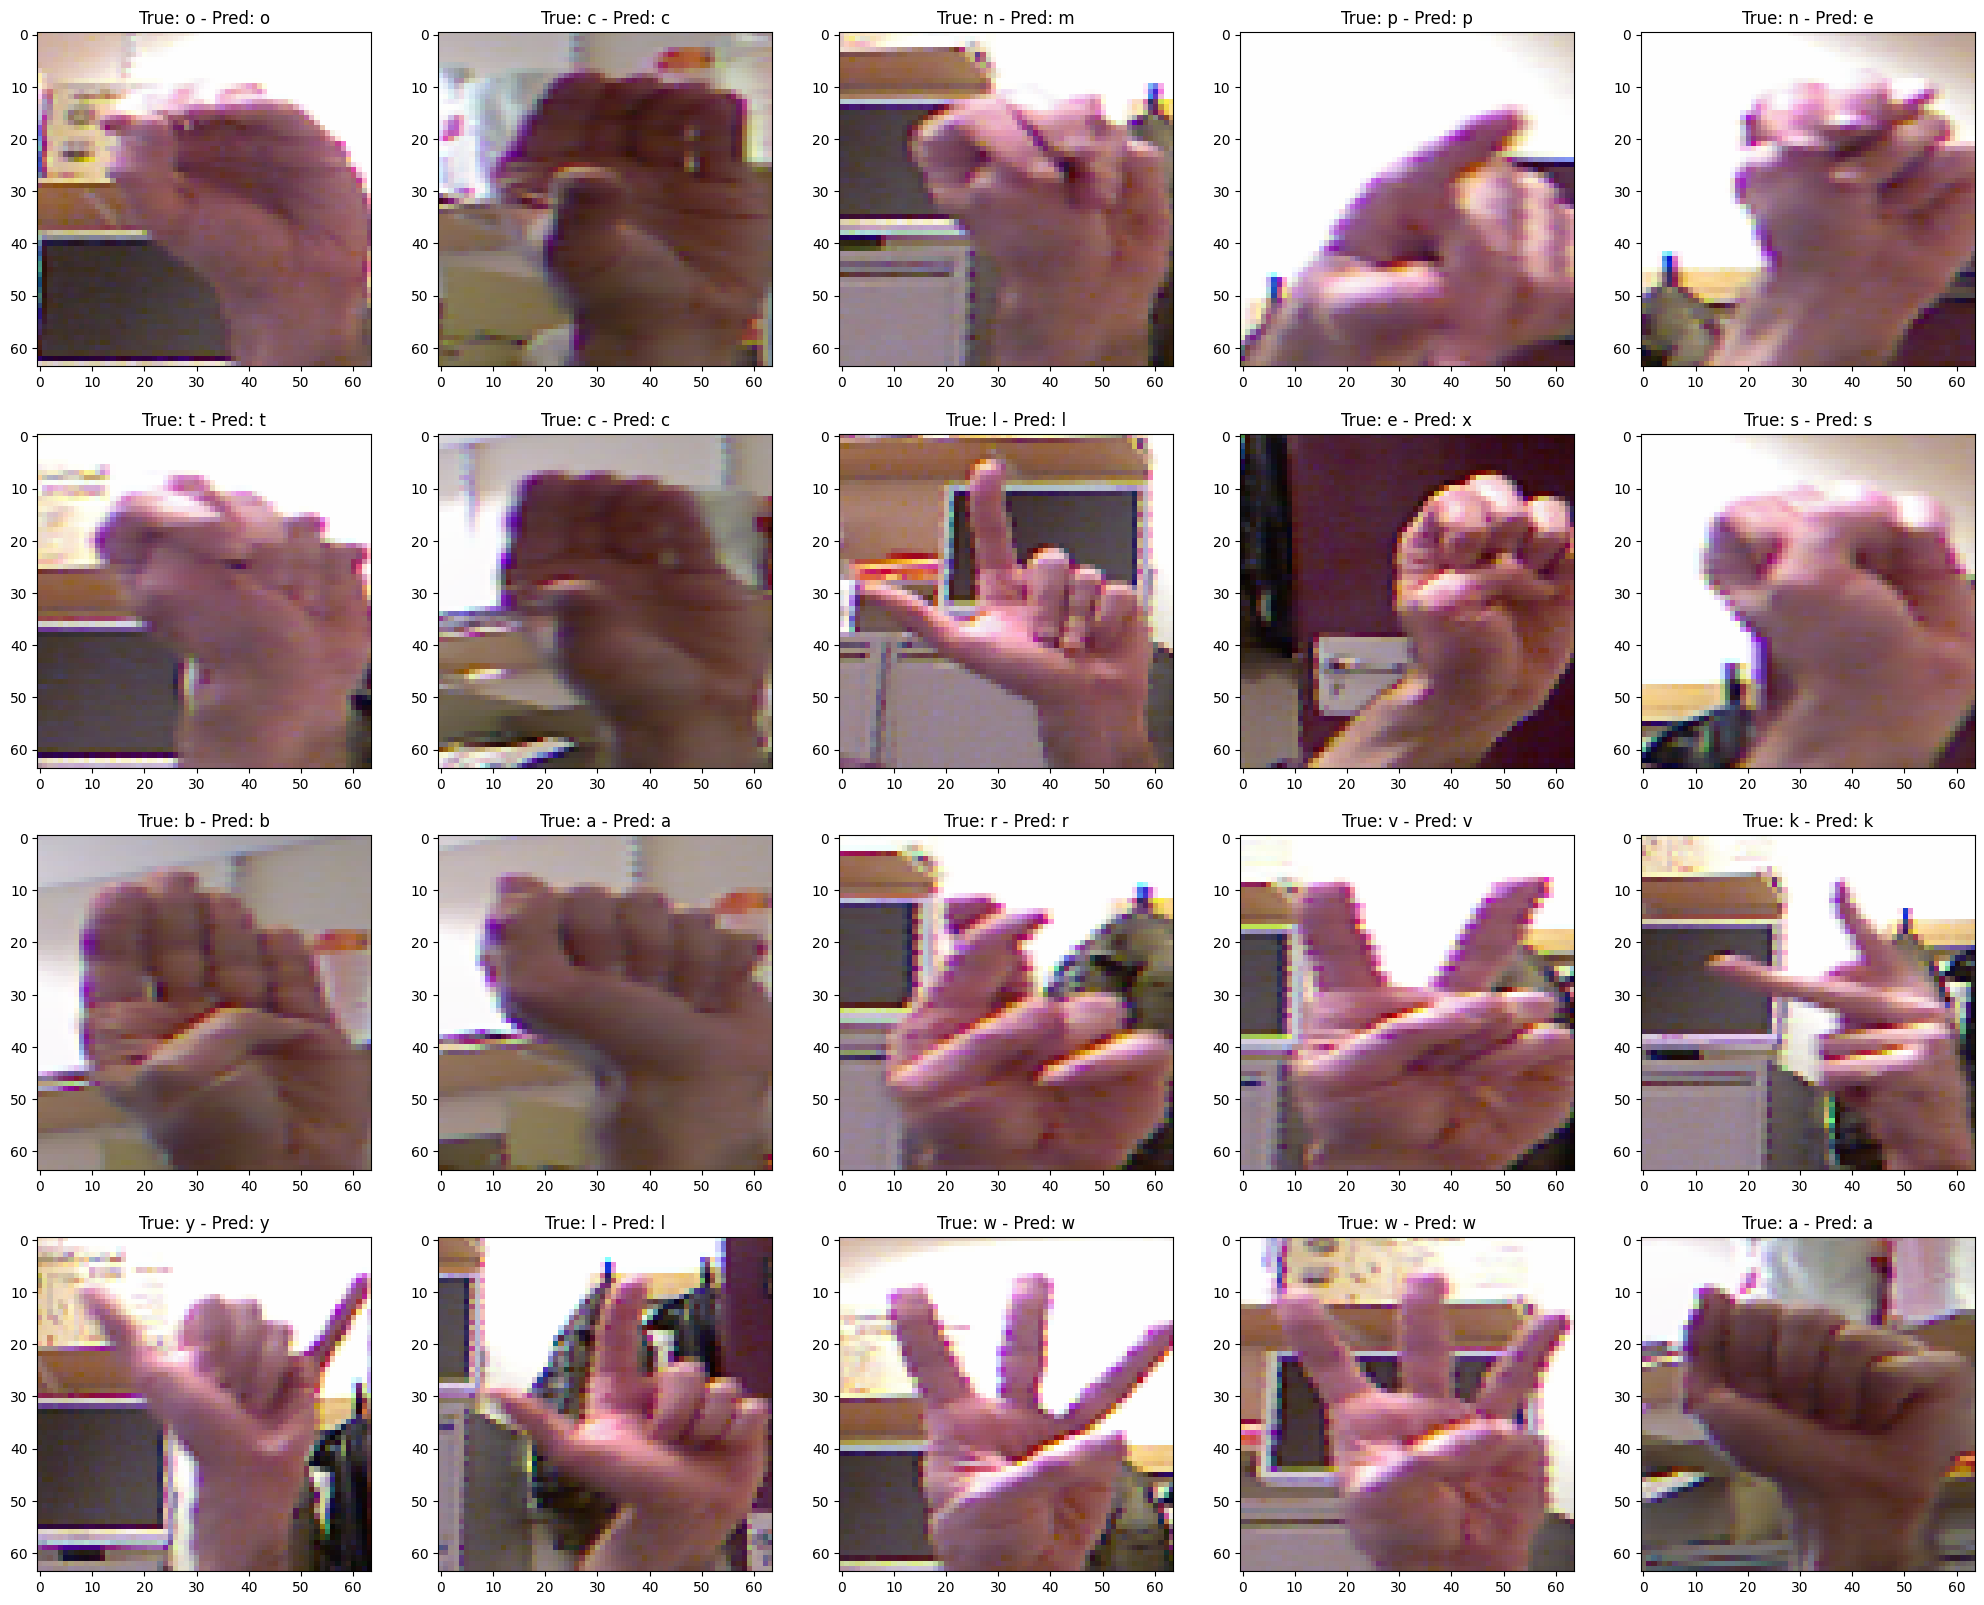

In [ ]:
preds = model.predict(X_test)

plt.figure(figsize=(25, 20))
num_images = 20
for i in range(num_images):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = lbl_binarizer.classes_[np.argmax(Y_test[i], axis=-1)]
    pred_label = lbl_binarizer.classes_[np.argmax(preds[i], axis=-1)]
    plt.title(f'True: {true_label} - Pred: {pred_label}')

plt.show()

In [ ]:
# Idealy I would run same epoch for both then compare. But I don't have access to GPU and didn't find where to get
# free credit as some CS courses did so can't run further. I ran around 10 epochs for depth though (just accidentally clear
# the output and can't take time rerun it that long), based on that data we wanna see for pure RGB and pure depth, seems like
# RGB is doing a better work.

In [ ]:
# Starting with Multimodal Model and reimport some libraries to be safe
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import glob
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [ ]:
def get_labels_images_multimodal(filepath):
    data_dict = {}
    for directory in glob.glob(filepath):
        images_rgb = []
        images_depth = []
        for file in glob.glob(os.path.join(directory, 'color_*.png')):
            images_rgb.append(file)
        for file in glob.glob(os.path.join(directory, 'depth_*.png')):
            images_depth.append(file)

        paired_images = []
        for rgb_path in images_rgb:
            filename = os.path.basename(rgb_path).replace('color_', 'depth_')
            depth_path = os.path.join(os.path.dirname(rgb_path), filename)
            if os.path.exists(depth_path):
                paired_images.append((rgb_path, depth_path))

        label = os.path.basename(os.path.normpath(directory))[-1]
        if paired_images:
            data_dict.setdefault(label, paired_images)
    return data_dict

dataset_dir = "/content/asl_dataset/dataset5/*/*"
data_dict = get_labels_images_multimodal(dataset_dir)
print(f'Total Labels: {len(data_dict)}')
print(f'Sample Data: {list(data_dict.items())[:1]}')

Total Labels: 24
Sample Data: [('p', [('/content/asl_dataset/dataset5/C/p/color_15_0446.png', '/content/asl_dataset/dataset5/C/p/depth_15_0446.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0269.png', '/content/asl_dataset/dataset5/C/p/depth_15_0269.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0292.png', '/content/asl_dataset/dataset5/C/p/depth_15_0292.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0498.png', '/content/asl_dataset/dataset5/C/p/depth_15_0498.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0427.png', '/content/asl_dataset/dataset5/C/p/depth_15_0427.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0273.png', '/content/asl_dataset/dataset5/C/p/depth_15_0273.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0370.png', '/content/asl_dataset/dataset5/C/p/depth_15_0370.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0403.png', '/content/asl_dataset/dataset5/C/p/depth_15_0403.png'), ('/content/asl_dataset/dataset5/C/p/color_15_0511.png', '/content/

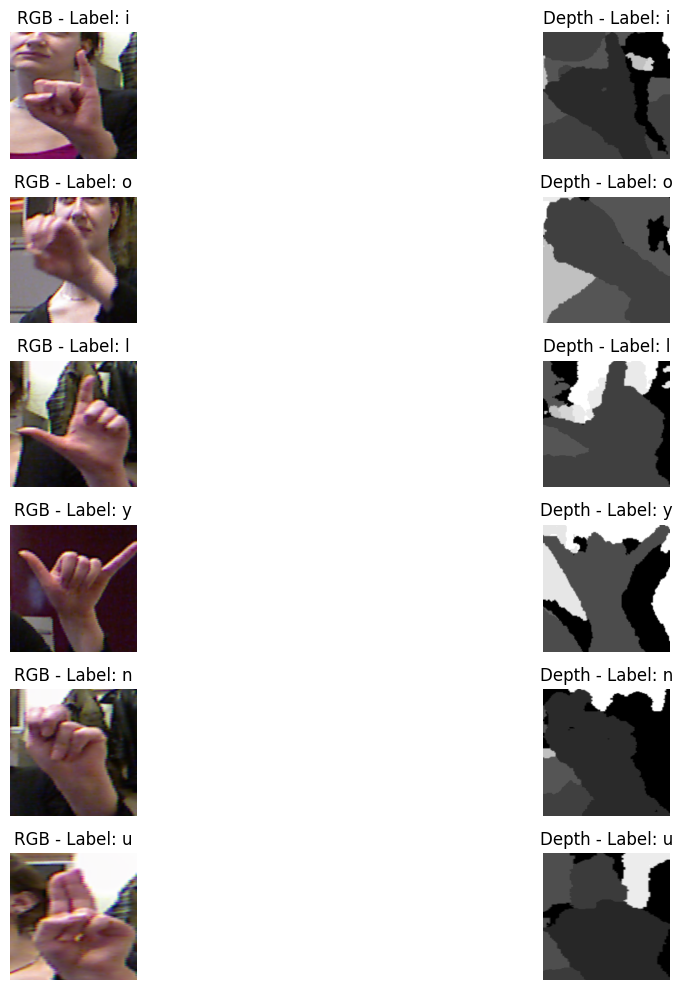

In [ ]:
import random

plt.figure(figsize=(15, 10))
labels_sample = random.sample(list(data_dict.keys()), min(6, len(data_dict)))

for i, label in enumerate(labels_sample):
    if len(data_dict[label]) == 0:
        continue
    rgb_path, depth_path = random.choice(data_dict[label])

    rgb_img = cv2.imread(rgb_path)
    rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
    rgb_img = cv2.resize(rgb_img, (224, 224))

    depth_img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
    depth_img = cv2.resize(depth_img, (224, 224))

    plt.subplot(6, 2, 2*i+1)
    plt.imshow(rgb_img)
    plt.title(f'RGB - Label: {label}')
    plt.axis('off')

    plt.subplot(6, 2, 2*i+2)
    plt.imshow(depth_img, cmap='gray')
    plt.title(f'Depth - Label: {label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
def preprocess_images_multimodal(dictionary, height=224, width=224):
    images_rgb = []
    images_depth = []
    labels = []
    for k, v in dictionary.items():
        for rgb_path, depth_path in v:
            rgb_img = cv2.imread(rgb_path)
            rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
            rgb_img = cv2.resize(rgb_img, (height, width))
            rgb_img = rgb_img / 255.0
            # Normalize

            depth_img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
            depth_img = cv2.resize(depth_img, (height, width))
            depth_img = depth_img / 255.0
            # Normalize
            depth_img = np.expand_dims(depth_img, axis=-1) # I'm adding a channel demension for depth image (later chenged to 3)

            images_rgb.append(rgb_img)
            images_depth.append(depth_img)
            labels.append(k)

    return (np.array(images_rgb), np.array(images_depth), np.array(labels))

images_rgb, images_depth, labels = preprocess_images_multimodal(data_dict)
print(f'RGB Images Shape: {images_rgb.shape}')
print(f'Depth Images Shape: {images_depth.shape}')
print(f'Labels Shape: {labels.shape}')

In [ ]:
lbl_binarizer = LabelBinarizer()
labels_encoded = lbl_binarizer.fit_transform(labels)
print(f'Classes: {lbl_binarizer.classes_}')

Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
X_train_rgb, X_test_rgb, X_train_depth, X_test_depth, Y_train, Y_test = train_test_split(
    images_rgb, images_depth, labels_encoded, test_size=0.2, random_state=1
)

X_train_rgb, X_dev_rgb, X_train_depth, X_dev_depth, Y_train, Y_dev = train_test_split(
    X_train_rgb, X_train_depth, Y_train, test_size=0.25, random_state=1
)

print(f'Number of training samples: {len(X_train_rgb)}, Shape: {X_train_rgb.shape}')
print(f'Number of dev samples: {len(X_dev_rgb)}, Shape: {X_dev_rgb.shape}')
print(f'Number of test samples: {len(X_test_rgb)}, Shape: {X_test_rgb.shape}')

##### Above is an idea about starting of multimodal model (a try but failed during proceeding, tried for several days but really failed. I tried to solve it and read many articles, I feel my implementation is correct. I found that most posts online with the error I met is with Googld Colab, so I think this might be the reason). I'm working on different approach on multimodal model below, still feel it's OK to leave the above several cells there.

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

image_pairs = []
labels_flat = []
for label, pairs in data_dict.items():
    for pair in pairs:
        image_pairs.append(pair)
        labels_flat.append(label)

lbl_binarizer = LabelBinarizer()
labels = lbl_binarizer.fit_transform(labels_flat)

if labels.shape[1] == 1:
    labels = np.hstack((1 - labels, labels))

print(f'Number of classes: {labels.shape[1]}')

# Training 60%
X_train_pairs, X_temp_pairs, Y_train, Y_temp = train_test_split(
    image_pairs, labels, test_size=0.4, random_state=42, stratify=labels
)

# Evaluate 20% and Test 20%
X_dev_pairs, X_test_pairs, Y_dev, Y_test = train_test_split(
    X_temp_pairs, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp
)

print('Number of training samples: {}, Number of dev samples: {}, Number of test samples: {}'.format(
    len(X_train_pairs), len(X_dev_pairs), len(X_test_pairs)
))

Number of classes: 24
Number of training samples: 8035, Number of dev samples: 2679, Number of test samples: 2679


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import cv2
import numpy as np
import math

class MultimodalDataGenerator(Sequence):
    def __init__(self, image_pairs, labels, batch_size=32, img_size=(224, 224), num_classes=24, shuffle=True):
        self.image_pairs = image_pairs
        self.labels = labels
        self.batch_size = batch_size
        self.img_size = img_size
        self.num_classes = num_classes
        self.shuffle = shuffle
        self.indexes = np.arange(len(self.image_pairs))
        self.on_epoch_end()

    def __len__(self):
        return math.ceil(len(self.image_pairs) / self.batch_size)

    def __getitem__(self, index):
        batch_indexes = self.indexes[index * self.batch_size : (index + 1) * self.batch_size]
        batch_pairs = [self.image_pairs[k] for k in batch_indexes]
        batch_labels = [self.labels[k] for k in batch_indexes]
        X_rgb, X_depth, y = self.__data_generation(batch_pairs, batch_labels)

        return [X_rgb, X_depth], y

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_pairs, batch_labels):
        X_rgb = np.empty((len(batch_pairs), self.img_size[0], self.img_size[1], 3), dtype=np.float32)
        X_depth = np.empty((len(batch_pairs), self.img_size[0], self.img_size[1], 3), dtype=np.float32)
        y = np.empty((len(batch_pairs), self.num_classes), dtype=np.float32)

        for i, ((rgb_path, depth_path), label) in enumerate(zip(batch_pairs, batch_labels)):
            # RGB
            rgb_img = cv2.imread(rgb_path)
            if rgb_img is None:
                print("Error 1:", rgb_path)
                rgb_img = np.zeros((self.img_size[0], self.img_size[1], 3), dtype=np.float32)
            else:
                rgb_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
                rgb_img = cv2.resize(rgb_img, self.img_size)
                rgb_img = rgb_img / 255.0
            X_rgb[i] = rgb_img

            # Depth
            depth_img = cv2.imread(depth_path, cv2.IMREAD_GRAYSCALE)
            if depth_img is None:
                print("Errir 2:", depth_path)
                depth_img = np.zeros((self.img_size[0], self.img_size[1]), dtype=np.float32)
            else:
                depth_img = cv2.resize(depth_img, self.img_size)
                depth_img = depth_img / 255.0
                depth_img = np.stack((depth_img,)*3, axis=-1)

            X_depth[i] = depth_img
            y[i] = label

        return X_rgb, X_depth, y

In [ ]:
batch_size = 32
img_size = (224, 224)
num_classes = Y_train.shape[1]

train_generator = MultimodalDataGenerator(
    image_pairs=X_train_pairs,
    labels=Y_train,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=True
)

dev_generator = MultimodalDataGenerator(
    image_pairs=X_dev_pairs,
    labels=Y_dev,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=False
)

test_generator = MultimodalDataGenerator(
    image_pairs=X_test_pairs,
    labels=Y_test,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=False
)

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model

input_rgb = Input(shape=(224, 224, 3), name='input_rgb')
input_depth = Input(shape=(224, 224, 3), name='input_depth')

resnet_rgb = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_rgb,
    name='resnet_rgb'
)
for layer in resnet_rgb.layers:
    layer.trainable = False
x_rgb = resnet_rgb.output
x_rgb = GlobalAveragePooling2D(name='rgb')(x_rgb)

resnet_depth = ResNet50(
    weights='imagenet',
    include_top=False,
    input_tensor=input_depth,
    name='resnet_depth'
)
for layer in resnet_depth.layers:
    layer.trainable = False
x_depth = resnet_depth.output
x_depth = GlobalAveragePooling2D(name='depth')(x_depth)

combined = concatenate([x_rgb, x_depth], name='features')

combined = Dense(512, activation='relu', name='dense_1')(combined)
combined = Dropout(0.5, name='dropout_1')(combined)
combined = Dense(256, activation='relu', name='dense_2')(combined)
combined = Dropout(0.5, name='dropout_2')(combined)

preds = Dense(num_classes, activation='softmax', name='predictions')(combined)
model = Model(inputs=[input_rgb, input_depth], outputs=preds)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

models_dir = 'saved_models'
os.makedirs(models_dir, exist_ok=True)

model_weights_path = os.path.join(models_dir, 'resnet50_multimodal_model.keras')

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath=model_weights_path,
                    monitor='val_loss',
                    save_best_only=True,
                    verbose=1)
]

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=dev_generator,
    callbacks=callbacks,
    verbose=2
)

In [ ]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from sklearn.datasets import load_files
from keras.preprocessing import image
from tqdm import tqdm
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D, MaxPooling2D
import scipy
import keras.applications.vgg16 as vgg16
import keras.applications.vgg19 as vgg19
import keras.applications.resnet50 as resnet50
import tensorflow as tf
import seaborn as sn
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelBinarizer

image_pairs = []
labels_flat = []
for label, pairs in data_dict.items():
    for pair in pairs:
        image_pairs.append(pair)
        labels_flat.append(label)

lbl_binarizer = LabelBinarizer()
labels = lbl_binarizer.fit_transform(labels_flat)

if labels.shape[1] == 1:
    labels = np.hstack((1 - labels, labels))
print(f'Number of classes: {labels.shape[1]}')

Number of classes: 24


In [ ]:
from sklearn.model_selection import train_test_split

# Same spliting as before, again here to be safe
X_train_pairs, X_temp_pairs, Y_train, Y_temp = train_test_split(
    image_pairs, labels, test_size=0.4, random_state=42, stratify=labels
)

X_dev_pairs, X_test_pairs, Y_dev, Y_test = train_test_split(
    X_temp_pairs, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp
)

print('Number of training samples: {}, Number of dev samples: {}, Number of test samples: {}'.format(
    len(X_train_pairs), len(X_dev_pairs), len(X_test_pairs)
))

Number of training samples: 8035, Number of dev samples: 2679, Number of test samples: 2679


In [ ]:
batch_size = 32 # changing later
img_size = (224, 224)
num_classes = Y_train.shape[1]

# Still, same as before, include here to be safe
train_generator = MultimodalDataGenerator(
    image_pairs=X_train_pairs,
    labels=Y_train,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=True
)

dev_generator = MultimodalDataGenerator(
    image_pairs=X_dev_pairs,
    labels=Y_dev,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=False
)

test_generator = MultimodalDataGenerator(
    image_pairs=X_test_pairs,
    labels=Y_test,
    batch_size=batch_size,
    img_size=img_size,
    num_classes=num_classes,
    shuffle=False
)

In [ ]:
# Bit of naive to avoid the error as met above, the one I think associate with Google Colab
n_pixels = 197
num_classes = 24  # Number of ASL letters

model = Sequential()

model.add(Conv2D(filters=512, kernel_size=1, activation='relu', input_shape=(1, 1, 2048)))
model.add(Dropout(0.2))

# 2nd Conv2D layer
model.add(Conv2D(filters=256, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

# 3rd Conv2D layer
model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.2))

# 4th Conv2D layer
model.add(Conv2D(filters=128, kernel_size=1, activation='relu'))

model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 1, 512)           │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 1, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 128)           │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,232,920 (4.70 MB)

 Trainable params: 1,232,920 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Read in trained model
model_weights_path = '/content/drive/My Drive/APDS_2024/resnet50_trained.hdf5'
model.load_weights(model_weights_path)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 1, 512)           │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 1, 1, 256)           │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 1, 1, 128)           │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,232,920 (4.70 MB)

 Trainable params: 1,232,920 (4.70 MB)

 Non-trainable params: 0 (0.00 B)

<ipython-input-30-c3e5391631cc>:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  confusion_arr = pd.read_csv(counts_path, header=None, delim_whitespace=True).values
<ipython-input-30-c3e5391631cc>:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  confusion_arr_percents = pd.read_csv(percent_path, header=None, delim_whitespace=True).values


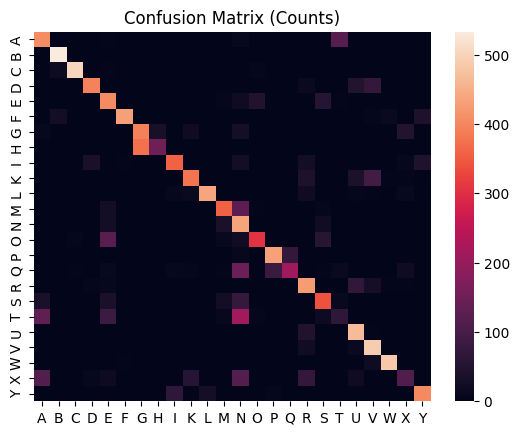

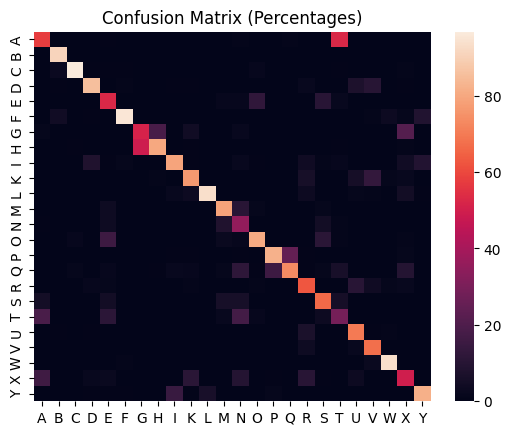

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Read in data for confusion matrix recorded
counts_path = '/content/drive/My Drive/APDS_2024/confusionMatrix_counts.csv'
percent_path = '/content/drive/My Drive/APDS_2024/confusionMatrix_percent.csv'

# Based on file's pattern
confusion_arr = pd.read_csv(counts_path, header=None, delim_whitespace=True).values
confusion_arr_percents = pd.read_csv(percent_path, header=None, delim_whitespace=True).values

# J and Z is not included
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

df_cm_counts = pd.DataFrame(confusion_arr, index=[i for i in letters], columns=[i for i in letters])
plt.figure()
sn.heatmap(df_cm_counts)
plt.title("Confusion Matrix (Counts)")
plt.show()

df_cm_percent = pd.DataFrame(confusion_arr_percents * 100, index=letters, columns=letters)
plt.figure()
sn.heatmap(df_cm_percent)
plt.title("Confusion Matrix (Percentages)")
plt.show()


##### Because of the long time span this project took and multiple debugging andd revising, some sequences of cells might be run. Some mistakenly clearing the output also cause loss of some data. But all necessary code cells should be included in this file. Based on the accuracy we have, we might wanna say RGB itself is actually doing a better job, with VGG19 (with an accuracy 85.86% on test set. Pure depth is much lower while combination of these two is around 60%). Further work shall be done for more testing combinations and more complex custom CNN.